In [5]:
pip install tensorflow

  Using cached keras-2.14.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: C:\Users\Apurva\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
pip install keras_visualizer

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: C:\Users\Apurva\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install --upgrade keras


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: C:\Users\Apurva\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install keras==2.4.3

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.4.3 which is incompatible.

[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: C:\Users\Apurva\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler

In [8]:
# Load your dataset (replace 'your_data.csv' with your actual dataset)
data = pd.read_csv('merged_file.csv')

In [9]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [10]:
# Fill NaN values with forward fill
data.fillna(method='bfill', inplace=True)

In [11]:
# Check for NaN values
print("Number of NaN values:", data.isnull().sum().sum())

Number of NaN values: 0


In [12]:
# Split the data into features (X) and target (y)
X = data.drop(['Miscellaneous electric load for the South Wing', 'Miscellaneous electric load for the North Wing',
               'Lighting load for the South Wing', 'Heating Ventilation and Air Conditioning load for the South Wing',
               'Heating Ventilation and Air Conditioning load for the North Wing'], axis=1)


In [13]:
# Define a list of target variables
target_columns = ['Miscellaneous electric load for the South Wing', 'Miscellaneous electric load for the North Wing',
                   'Lighting load for the South Wing', 'Heating Ventilation and Air Conditioning load for the South Wing',
                   'Heating Ventilation and Air Conditioning load for the North Wing']

In [17]:
# Define your custom split ratios
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

# Calculate the split points
total_length = len(X)
train_split = int(train_ratio * total_length)
validation_split = int((train_ratio + validation_ratio) * total_length)

# Split the data
X_train, y_train = X[:train_split], data[target_columns][:train_split]
X_val, y_val = X[train_split:validation_split], data[target_columns][train_split:validation_split]
X_test, y_test = X[validation_split:], data[target_columns][validation_split:]


In [18]:
# Reshape the data for RNN input (3D tensor with shape: [samples, time steps, features])
X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_reshaped = X_val.values.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# Initialize an empty dictionary to store RNN models
rnn_models = {}

In [23]:
# Train an RNN model for each target variable
for target_column in target_columns:
    y_train_col = y_train[target_column]
    y_val_col = y_val[target_column]
    y_test_col = y_test[target_column]

    # Build the RNN model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model with early stopping
    es = EarlyStopping(monitor='val_loss', patience=10)
    model.fit(X_train_reshaped, y_train_col, epochs=100, validation_data=(X_val_reshaped, y_val_col), callbacks=[es])

    # Make predictions
    rnn_predictions = model.predict(X_test_reshaped)

    # Calculate RMSE for each model
    rnn_rmse = np.sqrt(mean_squared_error(y_test_col, rnn_predictions))
    print(f"RNN RMSE for {target_column}: {rnn_rmse}")

    # Store the trained model
    rnn_models[target_column] = model

Epoch 1/100
1617/1617 [==============================] - 37s 20ms/step - loss: 492.0938 - val_loss: 1386.7947
Epoch 2/100
1617/1617 [==============================] - 28s 18ms/step - loss: 19.6961 - val_loss: 310.8765
Epoch 3/100
1617/1617 [==============================] - 28s 17ms/step - loss: 35.6936 - val_loss: 256.9455
Epoch 4/100
1617/1617 [==============================] - 29s 18ms/step - loss: 13.8133 - val_loss: 371.9567
Epoch 5/100
1617/1617 [==============================] - 29s 18ms/step - loss: 9.1292 - val_loss: 123.3912
Epoch 6/100
1617/1617 [==============================] - 32s 20ms/step - loss: 9.3385 - val_loss: 87.7438
Epoch 7/100
1617/1617 [==============================] - 34s 21ms/step - loss: 7.8674 - val_loss: 59.9905
Epoch 8/100
1617/1617 [==============================] - 31s 19ms/step - loss: 7.4088 - val_loss: 54.0615
Epoch 9/100
1617/1617 [==============================] - 32s 20ms/step - loss: 7.2893 - val_loss: 58.7686
Epoch 10/100
1617/1617 [===========

KeyboardInterrupt: 

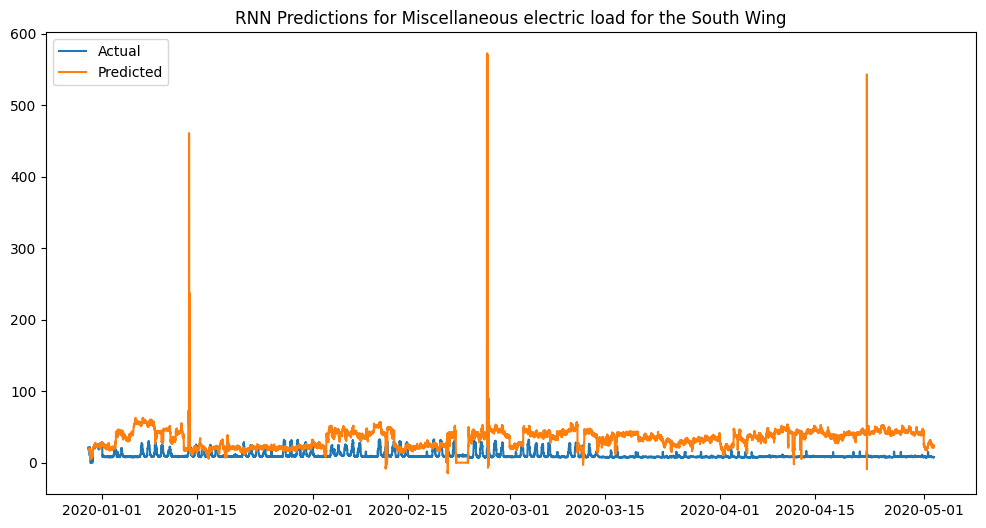

In [ ]:
# Visualize results for one of the models
plt.figure(figsize=(12, 6))
plt.title('RNN Predictions for Miscellaneous electric load for the South Wing')
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, rnn_predictions, label='Predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, rnn_predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, rnn_predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared (R^2)
r2 = r2_score(y_test, rnn_predictions)
print("R-squared (R^2):", r2)


Mean Squared Error (MSE): 965.6392312360057
Root Mean Squared Error (RMSE): 31.074736221503244
Mean Absolute Error (MAE): 24.292949105049164
R-squared (R^2): -34.79376570008987


In [ ]:
# Initialize empty dictionaries to store the scores
train_scores = {}
test_scores = {}


In [ ]:
# Calculate RMSE, MAE, and R-squared for the training set
y_train_pred = model.predict(X_train_reshaped)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

1617/1617 [==============================] - 4s 2ms/step


In [ ]:
# Calculate RMSE, MAE, and R-squared for the test set
test_rmse = np.sqrt(mean_squared_error(y_test, rnn_predictions))
test_mae = mean_absolute_error(y_test, rnn_predictions)
test_r2 = r2_score(y_test, rnn_predictions)

In [ ]:
for target_column in target_columns:
    train_scores [target_column] = {
        'RMSE': train_rmse,
        'MAE': train_mae,
        'R-squared': train_r2
    }

    test_scores[target_column] = {
        'RMSE': test_rmse,
        'MAE': test_mae,
        'R-squared': test_r2
    }

    # Print the scores for each target variable
    print(f"Target Variable: {target_column}")
    print("Training Set Scores:")
    print(train_scores[target_column])
    print("Test Set Scores:")
    print(test_scores[target_column])
    print("\n")

Target Variable: Miscellaneous electric load for the South Wing
Training Set Scores:
{'RMSE': 10.921566853326883, 'MAE': 7.958296797081053, 'R-squared': 0.4315829518717881}
Test Set Scores:
{'RMSE': 31.074736221503244, 'MAE': 24.292949105049164, 'R-squared': -34.79376570008987}


Target Variable: Miscellaneous electric load for the North Wing
Training Set Scores:
{'RMSE': 10.921566853326883, 'MAE': 7.958296797081053, 'R-squared': 0.4315829518717881}
Test Set Scores:
{'RMSE': 31.074736221503244, 'MAE': 24.292949105049164, 'R-squared': -34.79376570008987}


Target Variable: Lighting load for the South Wing
Training Set Scores:
{'RMSE': 10.921566853326883, 'MAE': 7.958296797081053, 'R-squared': 0.4315829518717881}
Test Set Scores:
{'RMSE': 31.074736221503244, 'MAE': 24.292949105049164, 'R-squared': -34.79376570008987}


Target Variable: Heating Ventilation and Air Conditioning load for the South Wing
Training Set Scores:
{'RMSE': 10.921566853326883, 'MAE': 7.958296797081053, 'R-squared': 